<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP2/ML_TP2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [758]:
#Esto lo saquéé de internet es para graficar las distribuciones.

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [779]:
N = 50 #cantidad de datos

valores_a = np.random.normal((1,3), (1.5,0.75), (N,2)) #Vector de datos random-normales
valores_b = np.random.normal((-1,-2), (1,3), (N,2))

df1 = pd.DataFrame(valores_a, columns=['x','y']) #Hago dos columnas con datos
df1['etiqueta'] = 'a' #Una columna con etiquetas

df2 = pd.DataFrame(valores_b, columns=['x','y'])
df2['etiqueta'] = 'b'

df = pd.concat([df1,df2], ignore_index=True) #Concateno los dos df
df

,x,y,etiqueta
0,-1.815828,3.996197,a
1,1.282063,4.048686,a
2,0.676593,3.355559,a
3,1.429474,2.495931,a
4,-0.117962,2.141046,a
...,...,...,...
95,-0.416361,2.299212,b
96,-0.606869,-6.208587,b
97,-0.865129,4.539284,b
98,-2.077376,1.298704,b


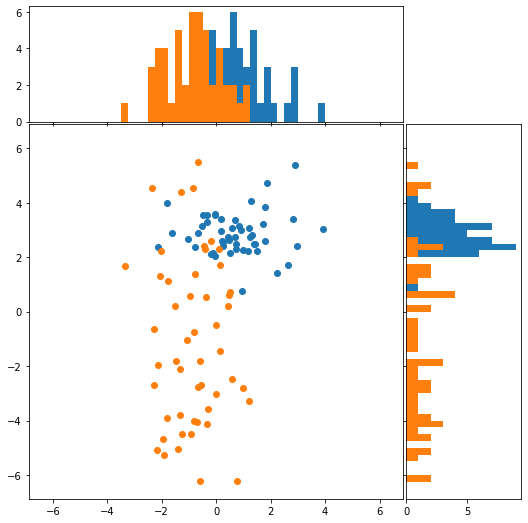

In [780]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(df1.x, df1.y, ax, ax_histx, ax_histy)
scatter_hist(df2.x, df2.y, ax, ax_histx, ax_histy)

plt.show()

Se puede ver que desde las dos direcciones las distribuciones tienen forma de gaussianas. Ahora encuentro los centros de las distribuciones, y el punto entre medio. 

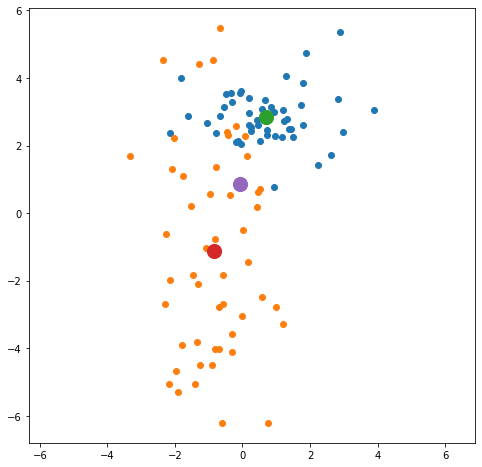

In [781]:
xc1 = df1.x.mean()
yc1 = df1.y.mean()
xc2 = df2.x.mean()
yc2 = df2.y.mean()
x0 = np.mean ([xc1,xc2]) #Punto en el medio
y0 = np.mean ([yc1,yc2])

plt.figure(figsize=(8, 8))
plt.scatter(df1.x,df1.y)
plt.scatter(df2.x,df2.y)
plt.scatter(xc1,yc1, s=200)
plt.scatter(xc2,yc2, s=200)
plt.scatter(x0,y0, s=200)
plt.axis('equal')
plt.show()

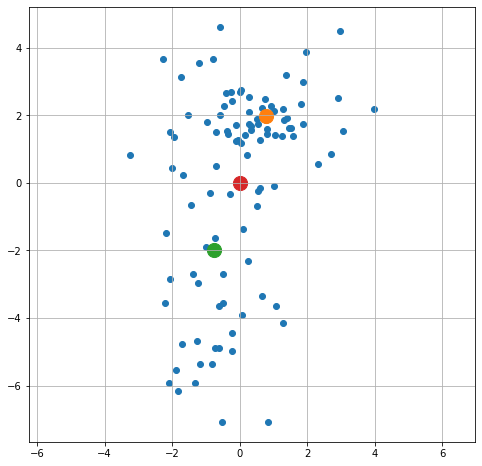

In [782]:
dfa = df.copy()
dfa['X'] = dfa['x']- x0 #Pongo el centro en (x0,y0)
dfa['Y'] = dfa['y']- y0

fig = plt.figure(figsize=(8, 8))
plt.scatter(dfa.X,dfa.Y)
plt.scatter(xc1 - x0, yc1 - y0, s=200)
plt.scatter(xc2 - x0, yc2 - y0, s=200)
plt.scatter(0, 0, s=200)

plt.axis('equal')

plt.grid()


In [783]:
director_x = xc2-xc1 #Encuentor el vector director de la recta que une 
director_y = yc2-yc1 #los centros de las distribuciones

direc = np.array([director_x,director_y])
direc = direc/np.linalg.norm(direc) #Lo normalizo

theta = np.arctan(direc[1]/direc[0]) #encuentro el angulo de la recta al eje x

#Matriz de rotacióón para dejar la linea que une los centros sobre 
#el nuevo eje X_rot

R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])

A = dfa[['X', 'Y']].to_numpy() #Los datos desplazados, ahora los roto
A_rotado = A.dot(R)            #alrededor del nuevo centro

dfa[['X_rot','Y_rot']] = pd.DataFrame(A_rotado)
dfa

,x,y,etiqueta,X,Y,X_rot,Y_rot
0,-1.815828,3.996197,a,-1.737969,3.131343,2.290945,2.752711
1,1.282063,4.048686,a,1.359922,3.183832,3.460143,-0.116550
2,0.676593,3.355559,a,0.754451,2.490705,2.594973,0.197296
3,1.429474,2.495931,a,1.507332,1.631077,2.065777,-0.815493
4,-0.117962,2.141046,a,-0.040103,1.276192,1.175324,0.498886
...,...,...,...,...,...,...,...
95,-0.416361,2.299212,b,-0.338503,1.434358,1.214879,0.834288
96,-0.606869,-6.208587,b,-0.529010,-7.073441,-6.786049,-2.064692
97,-0.865129,4.539284,b,-0.787270,3.674430,3.141071,2.062742
98,-2.077376,1.298704,b,-1.999518,0.433851,-0.318577,2.021090


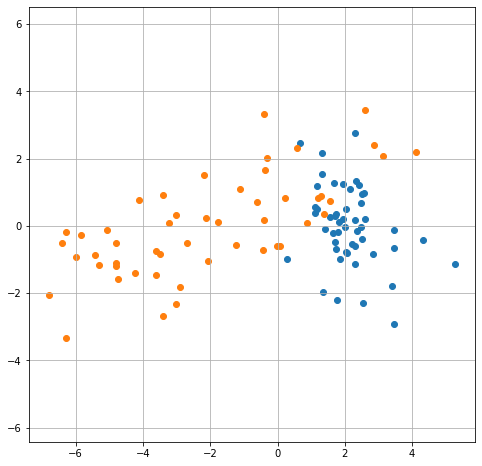

In [784]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(dfa['X_rot'].loc[dfa['etiqueta']=='a'], dfa['Y_rot'].loc[dfa['etiqueta']=='a'])
plt.scatter(dfa['X_rot'].loc[dfa['etiqueta']=='b'], dfa['Y_rot'].loc[dfa['etiqueta']=='b'])
plt.axis('equal')
plt.grid()
plt.show()

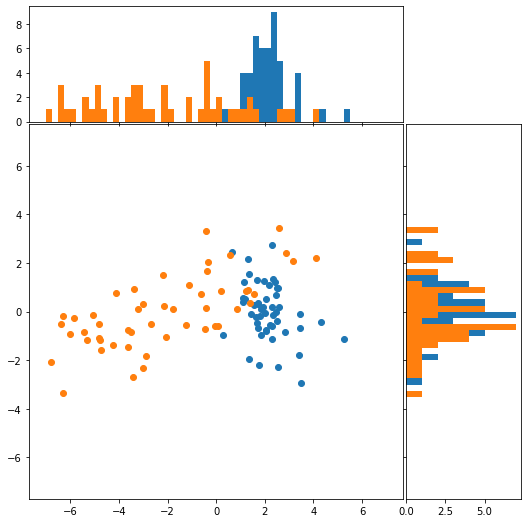

In [785]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(dfa['X_rot'].loc[dfa['etiqueta']=='a'], dfa['Y_rot'].loc[dfa['etiqueta']=='a'], ax, ax_histx, ax_histy)
scatter_hist(dfa['X_rot'].loc[dfa['etiqueta']=='b'], dfa['Y_rot'].loc[dfa['etiqueta']=='b'], ax, ax_histx, ax_histy)

plt.show()

Acáá se ve como en una direccion los histograma quedan totalmente solapadas, por lo que elegir la direccion correcta es fundamental.

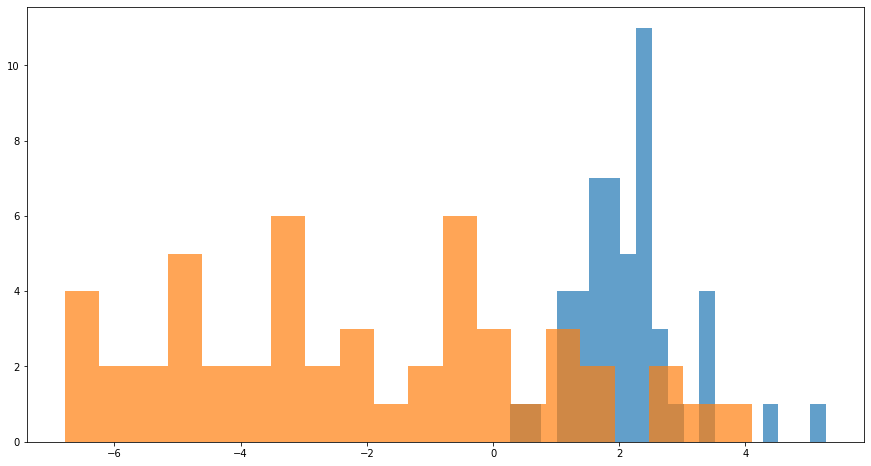

In [786]:
plt.figure(figsize=(15,8))
plt.hist(dfa['X_rot'].loc[dfa['etiqueta']=='a'], alpha=0.7, bins=20)
plt.hist(dfa['X_rot'].loc[dfa['etiqueta']=='b'], alpha=0.7, bins=20)
plt.show()

Como desde todas direcciones las curvas se ven como una gaussiana, voy a usar la curva ROC sobre la direccion que une los centros de las distribuciones (eje X_rot), mientras que los datos de Y_rot no los uso para nada. La celdas que siguen son copiadas del punto 2, menos las ultimas.

In [787]:
dfc = dfa.copy() #Hago una copia para que no me rompa el original

dfc['clasificacion'] = (dfc['etiqueta'] == 'b') #Me fijo cuales son b
#Entonces verdadero = 'es b', y falso = 'es a'
dfc = dfc.sort_values('X_rot') #ordeno usando la columna valor
dfc = dfc.set_index(pd.Series(range(dfc.shape[0]))) #reconstruyo el indice para que no quede desordenado

cantidad_de_b = dfc.clasificacion.sum() #Como True=1 y False=0, esta suma es igual a la cantidad de b
cantidad_de_a = dfc.shape[0] - cantidad_de_b

dfc['b_cumsum'] = dfc.clasificacion.cumsum() #Acumulo hacia abajo cuantas filas son de b 
dfc['TPR'] = dfc.clasificacion.cumsum()/cantidad_de_b #Divido los acumulados de b por la totalidad de b
dfc['a_cumsum']  = range(1,1+dfc.shape[0]) - dfc['b_cumsum'] #El primer termino siempre suma 1, 
                                            #               y el segundo es 1 si esa fila era b.
dfc['FPR'] = dfc['a_cumsum']/cantidad_de_a #Divido los acumulados de a por la totalidad de a
dfc.tail(10)

,x,y,etiqueta,X,Y,X_rot,Y_rot,clasificacion,b_cumsum,TPR,a_cumsum,FPR
90,1.735970,3.200625,a,1.813828,2.335771,2.833616,-0.846415,False,47,0.94,44,0.88
91,-1.298503,4.401962,b,-1.220645,3.537109,2.856326,2.417129,True,48,0.96,44,0.88
92,-0.865129,4.539284,b,-0.787270,3.674430,3.141071,2.062742,True,49,0.98,44,0.88
93,2.832590,3.387822,a,2.910448,2.522969,3.404706,-1.801127,False,49,0.98,45,0.90
94,1.282063,4.048686,a,1.359922,3.183832,3.460143,-0.116550,False,49,0.98,46,0.92
95,1.797031,3.858689,a,1.874890,2.993836,3.469228,-0.665375,False,49,0.98,47,0.94
96,3.905922,3.044936,a,3.983781,2.180082,3.473163,-2.925817,False,49,0.98,48,0.96
97,-0.650357,5.489014,b,-0.572498,4.624160,4.104194,2.205946,True,50,1.00,48,0.96
98,1.877613,4.728826,a,1.955472,3.863972,4.309618,-0.425844,False,50,1.00,49,0.98
99,2.887617,5.371668,a,2.965476,4.506814,5.274194,-1.135031,False,50,1.00,50,1.00


<Figure size 1080x576 with 0 Axes>

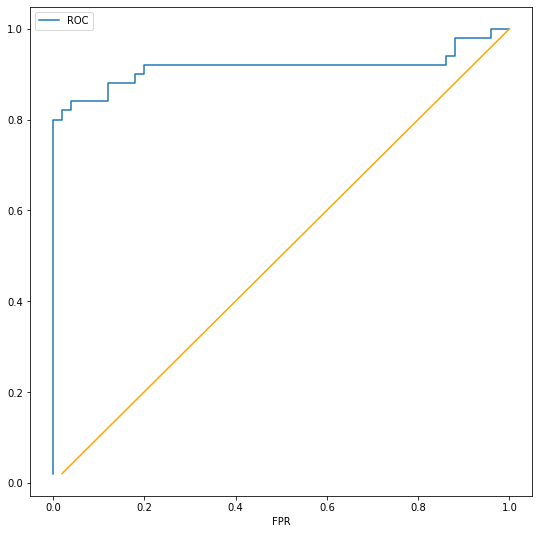

In [788]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfc.plot(x='FPR', y='TPR', figsize=(9,9), label='ROC') #Curva ROC
plt.plot(dfc['TPR'],dfc['TPR'], c='orange') #Identidad
plt.legend()
plt.show()

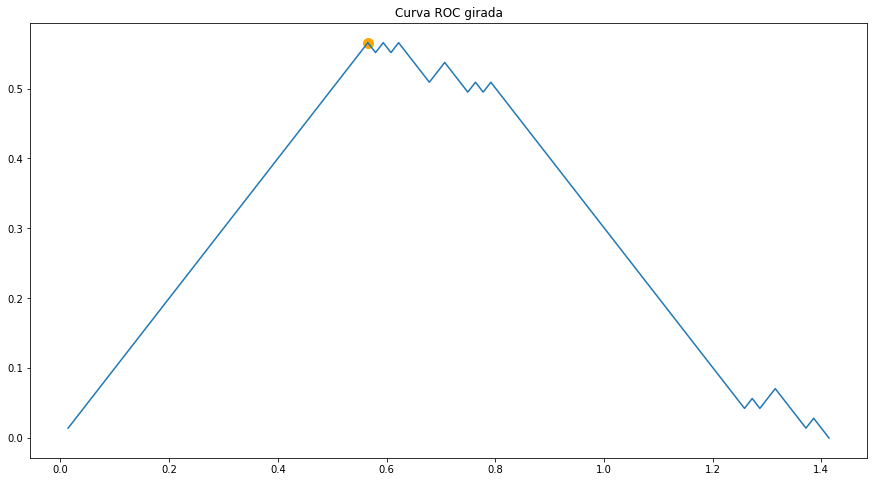

In [789]:
#Uso como paráámetro la mááxima distancia perpendicular a la recta identidad.
#Para encontrar ese punto, roto la curva 45 grados a la derecha, 
# entonces esa distancia se convierte en la altura

theta2 = np.pi/4
R2 = np.array([[np.cos(theta2),-np.sin(theta2)], 
              [np.sin(theta2),np.cos(theta2)]])
A2 = dfc[['FPR', 'TPR']].to_numpy()
A2_rotado = A2.dot(R2)

indice_max = np.where(A2_rotado[:,1] == A2_rotado[:,1].max()) 
#Con el ííndice del valor mááximo puedo encontrar  el punto original.

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(A2_rotado[:,0],A2_rotado[:,1])
plt.scatter(A2_rotado[indice_max,0],A2_rotado[indice_max,1], c='orange',s=100)
plt.title('Curva ROC girada')
plt.show()

<Figure size 1080x576 with 0 Axes>

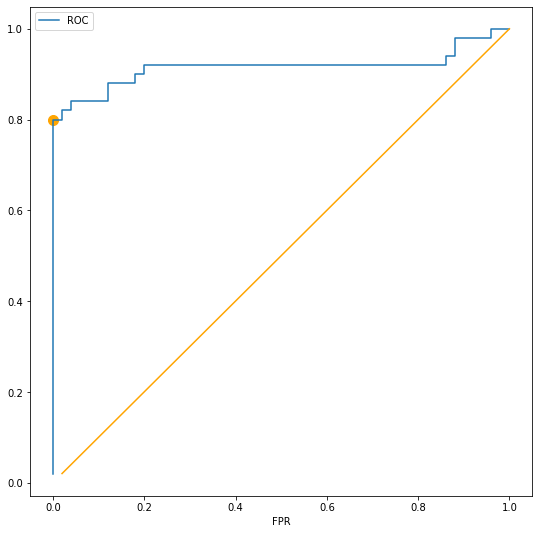

In [790]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfc.plot(x='FPR', y='TPR', figsize=(9,9), label='ROC') #Curva ROC
plt.plot(dfc['TPR'],dfc['TPR'], c='orange') #Identidad
plt.scatter(A2[indice_max,0],A2[indice_max,1], c='orange', s=100)
plt.legend()
plt.show()

In [791]:
#El punto indicado es:
dfc.iloc[indice_max[0]]

,x,y,etiqueta,X,Y,X_rot,Y_rot,clasificacion,b_cumsum,TPR,a_cumsum,FPR
39,-0.781918,1.370834,b,-0.70406,0.50598,0.217136,0.839386,True,40,0.8,0,0.0


In [792]:
dfb = dfc.copy() #Hago una copia para que no me rompa el original

dfb['TP'] = dfb['b_cumsum'] #Encuentro los TP en funcióón de si el umbral estáá puesto en tal fila
dfb['FP'] = dfb['a_cumsum'] #Lo mismo para el resto
dfb['TN'] = cantidad_de_a - dfb['FP']
dfb['FN'] = cantidad_de_b - dfb['TP']
dfb.head()

,x,y,etiqueta,X,Y,X_rot,Y_rot,clasificacion,b_cumsum,TPR,a_cumsum,FPR,TP,FP,TN,FN
0,-0.606869,-6.208587,b,-0.529010,-7.073441,-6.786049,-2.064692,True,1,0.02,0,0.0,1,0,50,49
1,-1.914650,-5.282800,b,-1.836791,-6.147654,-6.395835,-0.510631,True,2,0.04,0,0.0,2,0,50,48
2,0.764610,-6.215952,b,0.842468,-7.080806,-6.296961,-3.346020,True,3,0.06,0,0.0,3,0,50,47
3,-2.175208,-5.066682,b,-2.097350,-5.931536,-6.288566,-0.189553,True,4,0.08,0,0.0,4,0,50,46
4,-1.400493,-5.061820,b,-1.322634,-5.926674,-6.003880,-0.910082,True,5,0.10,0,0.0,5,0,50,45


<Figure size 1080x576 with 0 Axes>

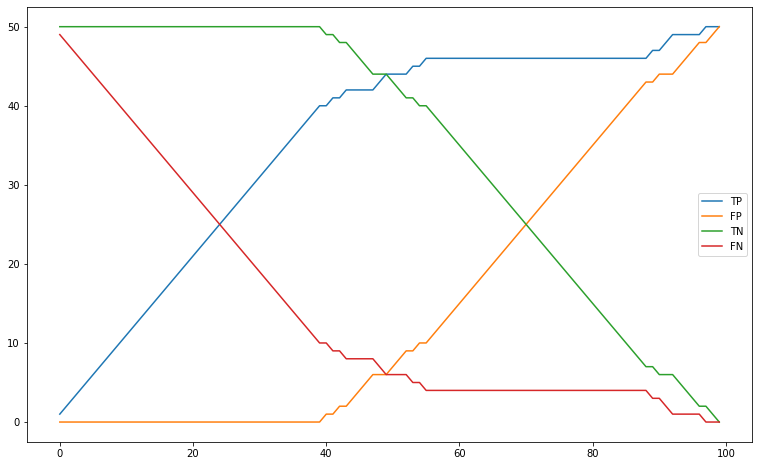

In [793]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
dfb[['TP', 'FP', 'TN', 'FN']].plot( figsize=(13,8))
plt.show()

<Figure size 1080x576 with 0 Axes>

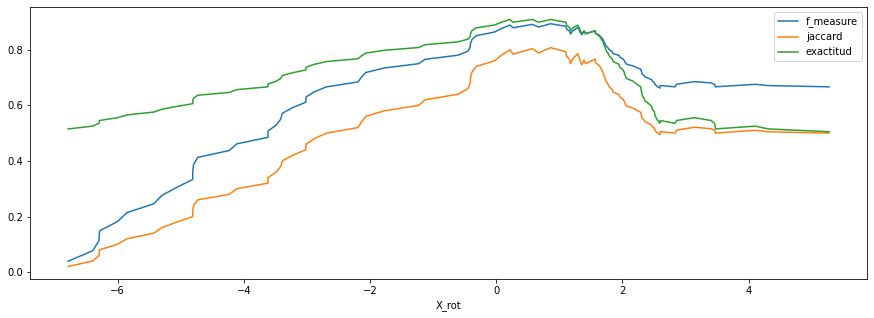

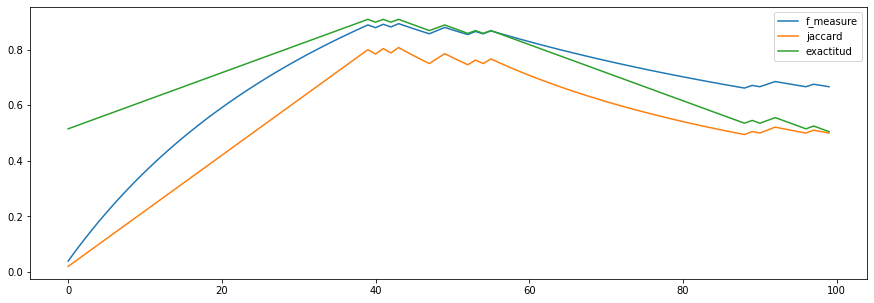

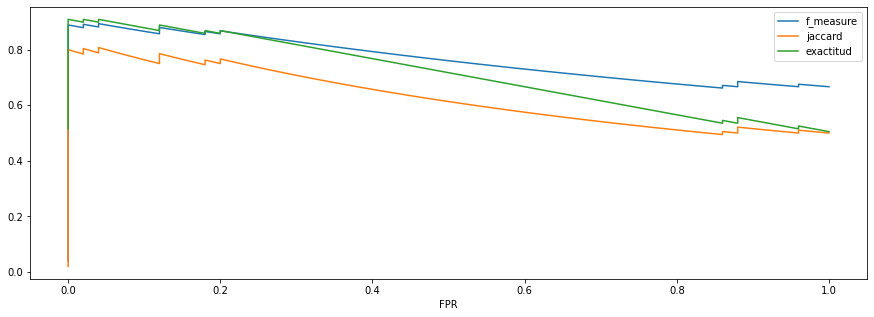

In [794]:
dfb['precision'] = dfb['TP']/ (dfb['TP'] + dfb['FP'])
dfb['f_measure'] = 2* dfb['precision'] * dfb['TPR'] / (dfb['precision'] + dfb['TPR'])
dfb['jaccard'] = dfb['TP']/ (dfb['TP'] + dfb['FP'] + dfb['FN'])
dfb['exactitud'] = ( dfb['TP'] + dfb['TN'] ) / (dfb.index[-1])

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
#Grááfico los tres indicadores para conocer el comportamiento
dfb.plot(x='X_rot', y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))
dfb.plot(y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))
dfb.plot(x='FPR', y=['f_measure', 'jaccard', 'exactitud'], figsize=(15,5))

plt.show()

Uso el mááximo de los indicadores para elegir el umbral. Dependiendo de las distribuciones de los datos originales, los indicadores pueden no tener un mááximo muy marcado. Esto tendríía que ver con los desvííos estandar y que tan superpuestas estáán las poblaciones. 

In [795]:
#Encuentro la fila del valor maximo de los indicadores, 
# lo que seríía el mejor punto para ubicar el umbral
max_jaccard = (dfb.loc[dfb['jaccard'] == dfb['jaccard'].max()]) 
max_f_measure = (dfb.loc[dfb['f_measure'] == dfb['f_measure'].max()])
max_exactitud = (dfb.loc[dfb['exactitud'] == dfb['exactitud'].max()])

umbral_roc = dfb['X_rot'][indice_max[0]] #Este umbral es el que saquéé antes con la curva ROC
umbral_jaccard = max_jaccard['X_rot']
umbral_f_measure = max_f_measure['X_rot']
umbral_exactitud = max_exactitud['X_rot']

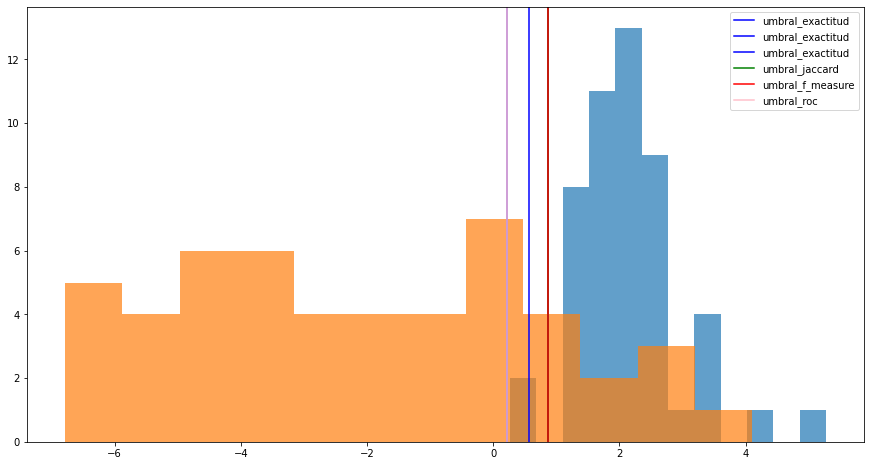

In [796]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

#Los for son necesarios porque los umbrales suelen no ser úúnicos
for x in umbral_exactitud.unique(): 
  plt.axvline(x=x, c='blue', label='umbral_exactitud')
for x in umbral_jaccard.unique():
  plt.axvline(x=x, c='green', label='umbral_jaccard')
for x in umbral_f_measure.unique():
  plt.axvline(x=x, c='red', label='umbral_f_measure')
for x in umbral_roc.unique():
  plt.axvline(x=x, c='pink', label='umbral_roc')     

plt.legend()
plt.hist(dfa['X_rot'].loc[dfa['etiqueta']=='a'], alpha=0.7, bins=12)
plt.hist(dfa['X_rot'].loc[dfa['etiqueta']=='b'], alpha=0.7, bins=12)
plt.show()

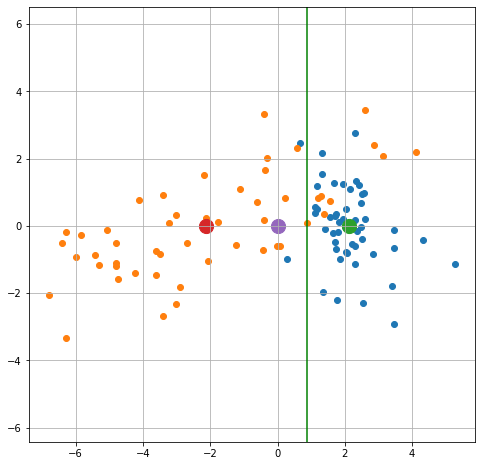

In [797]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(dfb['X_rot'].loc[dfb['etiqueta']=='a'], dfb['Y_rot'].loc[dfb['etiqueta']=='a'])
plt.scatter(dfb['X_rot'].loc[dfb['etiqueta']=='b'], dfb['Y_rot'].loc[dfb['etiqueta']=='b'])

[X_rotc1,Y_rotc1] = np.array([xc1-x0,yc1-y0]).dot(R)
[X_rotc2,Y_rotc2] = np.array([xc2-x0,yc2-y0]).dot(R)

plt.scatter(X_rotc1,Y_rotc1, s=200)
plt.scatter(X_rotc2,Y_rotc2, s=200)
plt.scatter(0,0, s=200)


plt.axvline(x=umbral_jaccard.unique(), c='green', label='umbral_jaccard')
plt.axis('equal')

plt.grid()

plt.show()